In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [111]:
llama_data = {}
for i in range(5):
    llama_data[i] = pd.read_csv(f"data/{i}_shot_data.tsv", sep="\t", decimal=",", index_col=0)

In [112]:
llama_data[1]

,definition,examples,generated,evaluated_generated,num_generated,unique_generated,definition_overlap,examples_overlap,overlap
10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...","['Es ist ein Foto , nur ein Foto , schwarz - w...","[""Es ist ein schwarz-weißes Foto"", ""Es ist ein...","['Es ist ein schwarz-weißes Foto', 'Es ist ein...",2,2,0.0,0.000000,0.000000
100,"Die ""Äquativ_Plural-Konstruktion"" gehört zu de...","['Wir würdigen Freiheit und Toleranz , sie ver...","[""Wir fördern den Schutz des Umwelt, während w...","['""Wir fördern den Schutz des Umwelt, während ...",1,1,0.0,0.086957,0.086957
1004,"Die ""Superlativ_Klimax:ADJ1_ADJ1-er_NP-Konstru...",['Wissenschafter der Regierung sind zum Schlus...,"[""Ich möchte gerne eine neue Jacke kaufen."", ""...","['Ich möchte gerne eine neue Jacke kaufen.', '...",4,4,0.0,0.000000,0.000000
1006,"Die ""Superlativ:PRÄP_ADJ-ster_NP-Konstruktion""...",['Der LSD - Rausch hat mich bisher am meisten ...,"[""Der Rauchsäule im Park ist am wenigsten ange...",['Der Rauchsäule im Park ist am wenigsten ange...,2,2,0.0,0.000000,0.000000
101,"Die ""Äquativ:ADJwieNP-Konstruktion"" gehört zu ...",['Weil Verschlüsselungstechnologie dabei eine ...,"[""Weil der KE 'Grund' erfüllt ist"", ""Weil der ...","[""Weil der KE 'Grund' erfüllt ist"", ""Weil der ...",3,3,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
97,"Die ""Komparativ:ADJ1-eralsADJ1-Konstruktion"" g...",['Und so schenkt er dem britischen Bond - Dars...,"[""Die mit Abstand lustigste Rolle"", ""Die mit A...","['Die mit Abstand lustigste Rolle', 'Die mit A...",10,10,0.0,0.000000,0.000000
973,"Bei ""Disjunktion_Doppeltitel:XoderY"" handelt e...",['Rope Skipping : das neue Seilspringen'],"[""Ihre Haare sind jetzt wie ein roter Faden"", ...","['Ihre Haare sind jetzt wie ein roter Faden', ...",2,2,0.0,0.000000,0.000000
976,"Bei ""Korrelation_Affirmation:WoXist, istY"" han...",['«Das ist Kommunismus pur.»'],"[""Das ist eine Kumme pure Empörung"", ""Das ist ...","['Das ist eine Kumme pure Empörung', 'Das ist ...",2,2,0.0,0.000000,0.000000
98,"Die ""Äquativ:soADJwieXP-Konstruktion"" gehört z...","['"" "" "" Probleme über Probleme - die NFL versa...","[""Meine Kugeln über Kugeln - ich habe es immer...",['Meine Kugeln über Kugeln - ich habe es immer...,19,3,0.0,0.200000,0.200000


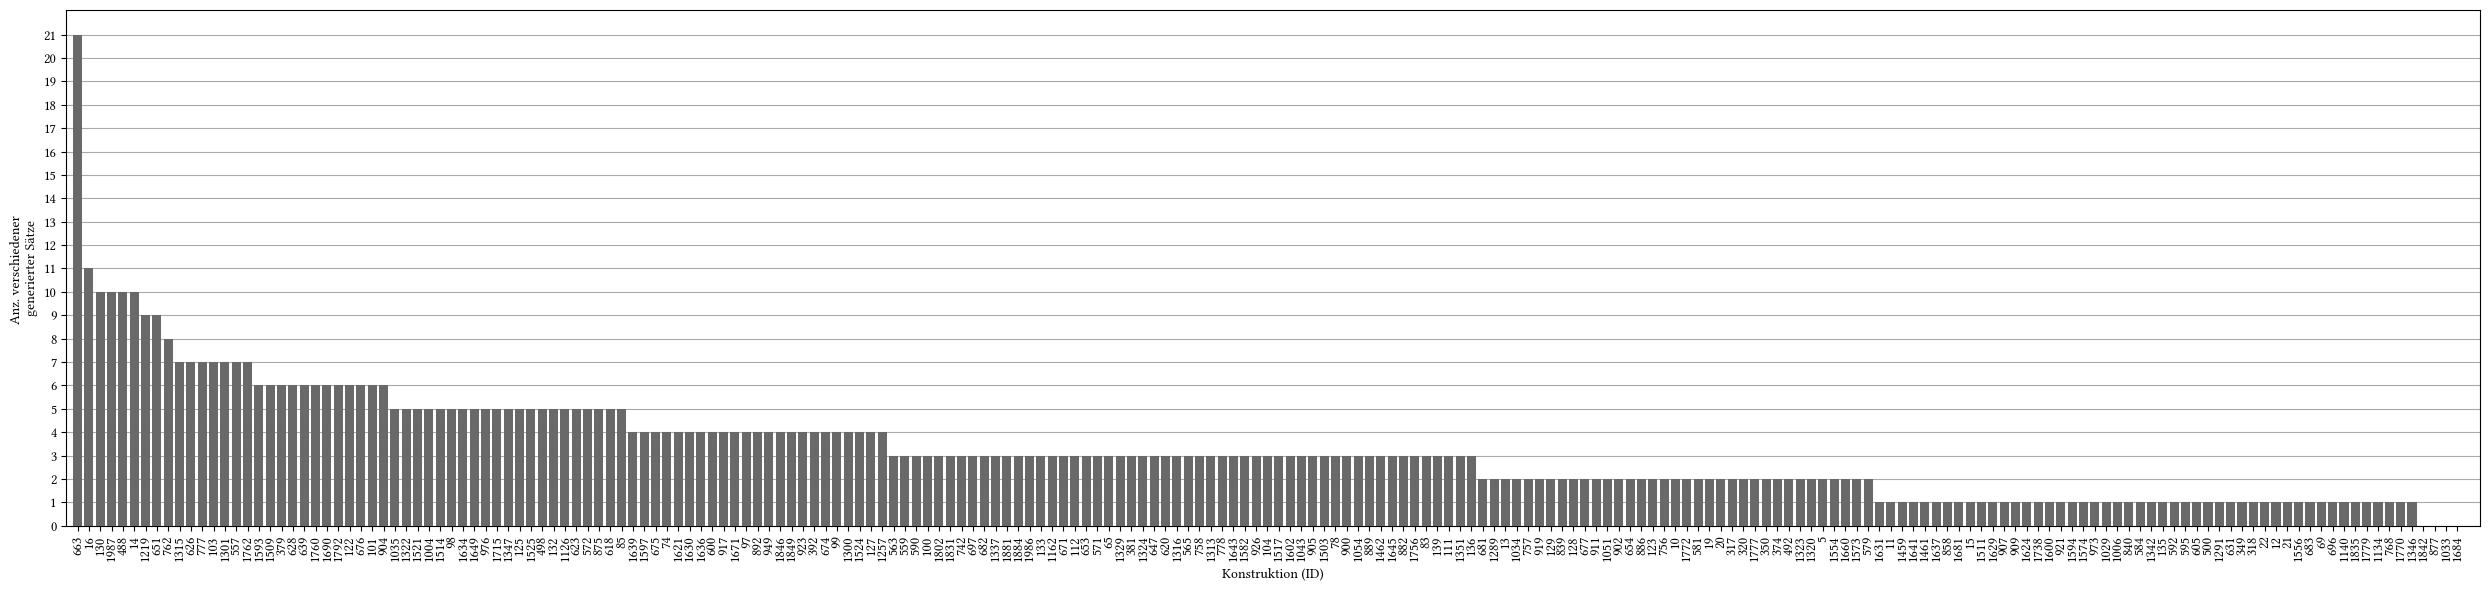

In [113]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["unique_generated"]
sorted_constructions = constr[0].sort_values(ascending=False)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))

plt.bar(constr_strings, sorted_constructions.values, color='dimgrey', zorder=3)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(constr[0].values) + 1, 1))

plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_zero.pdf')
plt.show()

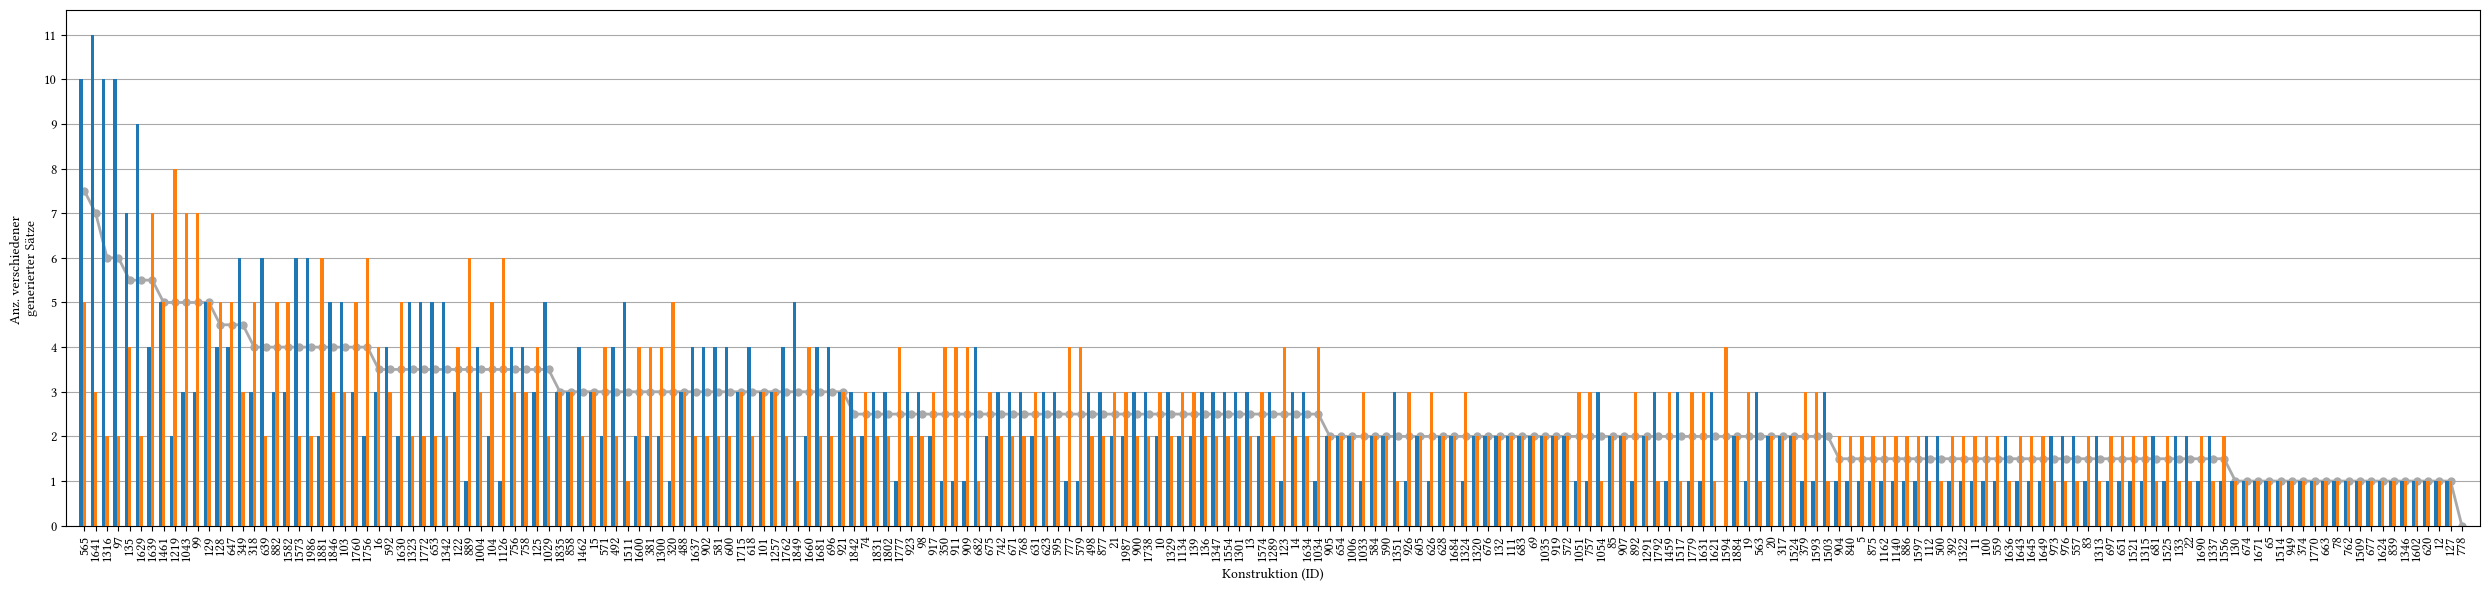

In [114]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["unique_generated"]

average_values = pd.concat([constr[1], constr[2]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=False)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))
    
# Plot the grouped bars
bar_width = 0.3
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width

ax.bar(bar_positions_1, constr[1][sorted_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][sorted_constructions.index], color='tab:orange', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[sorted_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)
plt.yticks(np.arange(0, max(constr[1].values) + 1, 1))

plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_2[-1] + 2 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_few.pdf')
plt.show()

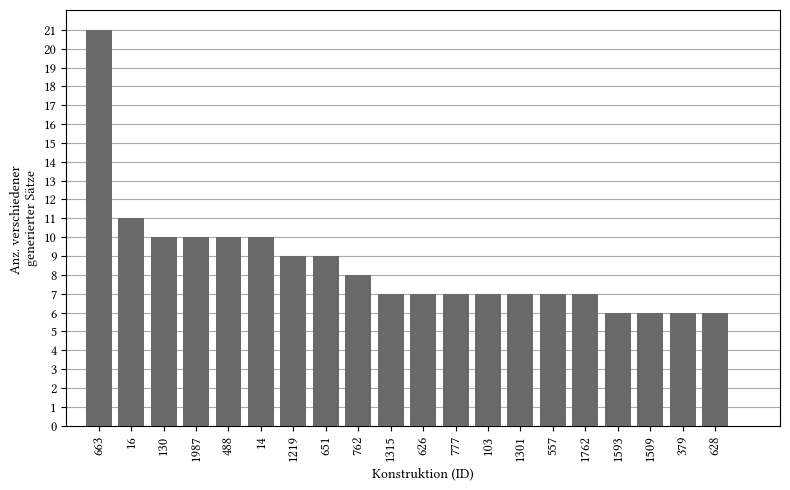

In [115]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["unique_generated"]
sorted_constructions = constr[0].sort_values(ascending=False)

top_20_constructions = sorted_constructions.head(20)
constr_strings = [str(i) for i in list(top_20_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))

plt.bar(constr_strings, top_20_constructions.values, color='dimgrey', zorder=3)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(constr[0].values) + 1, 1))

plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_zero_top20.pdf')
plt.show()

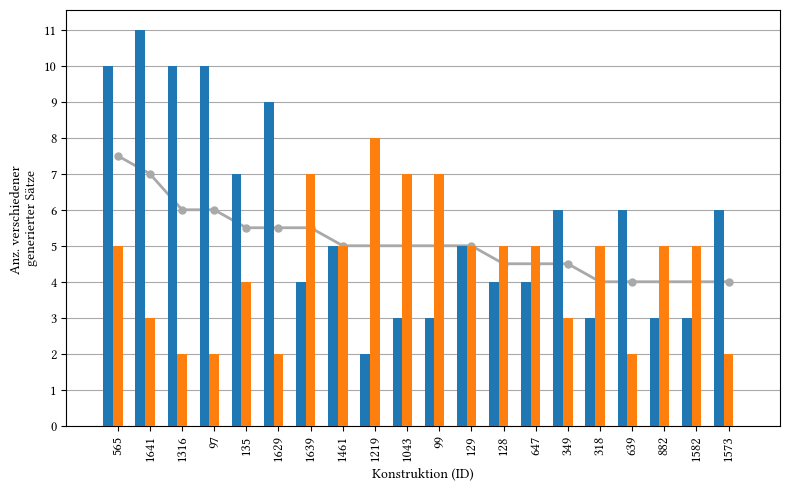

In [116]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["unique_generated"]

average_values = pd.concat([constr[1], constr[2]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=False)

top_20_constructions = sorted_constructions.head(20)
constr_strings = [str(i) for i in list(top_20_constructions.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))
    
# Plot the grouped bars
bar_width = 0.3
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width

ax.bar(bar_positions_1, constr[1][top_20_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][top_20_constructions.index], color='tab:orange', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[top_20_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anz. verschiedener \ngenerierter Sätze')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)
plt.yticks(np.arange(0, max(constr[1].values) + 1, 1))

plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_2[-1] + 2 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_unique_few_top20.pdf')
plt.show()

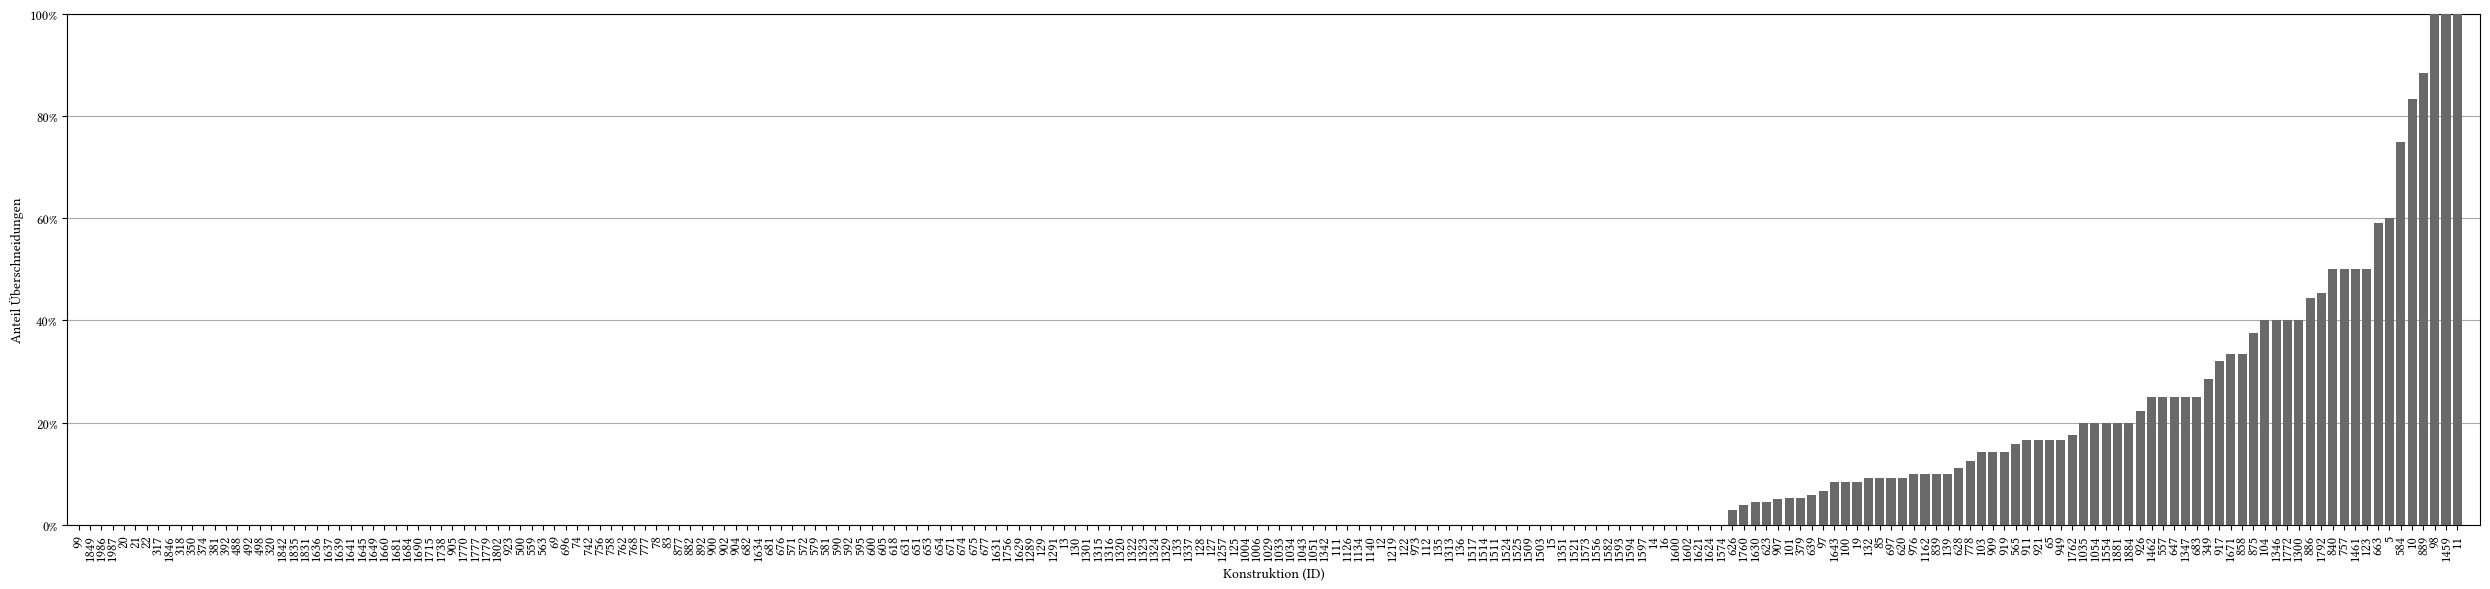

In [117]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]
sorted_constructions = constr[0].sort_values(ascending=True)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))

plt.bar(constr_strings, sorted_constructions.values, color='dimgrey', zorder=3)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_zero.pdf')
plt.show()

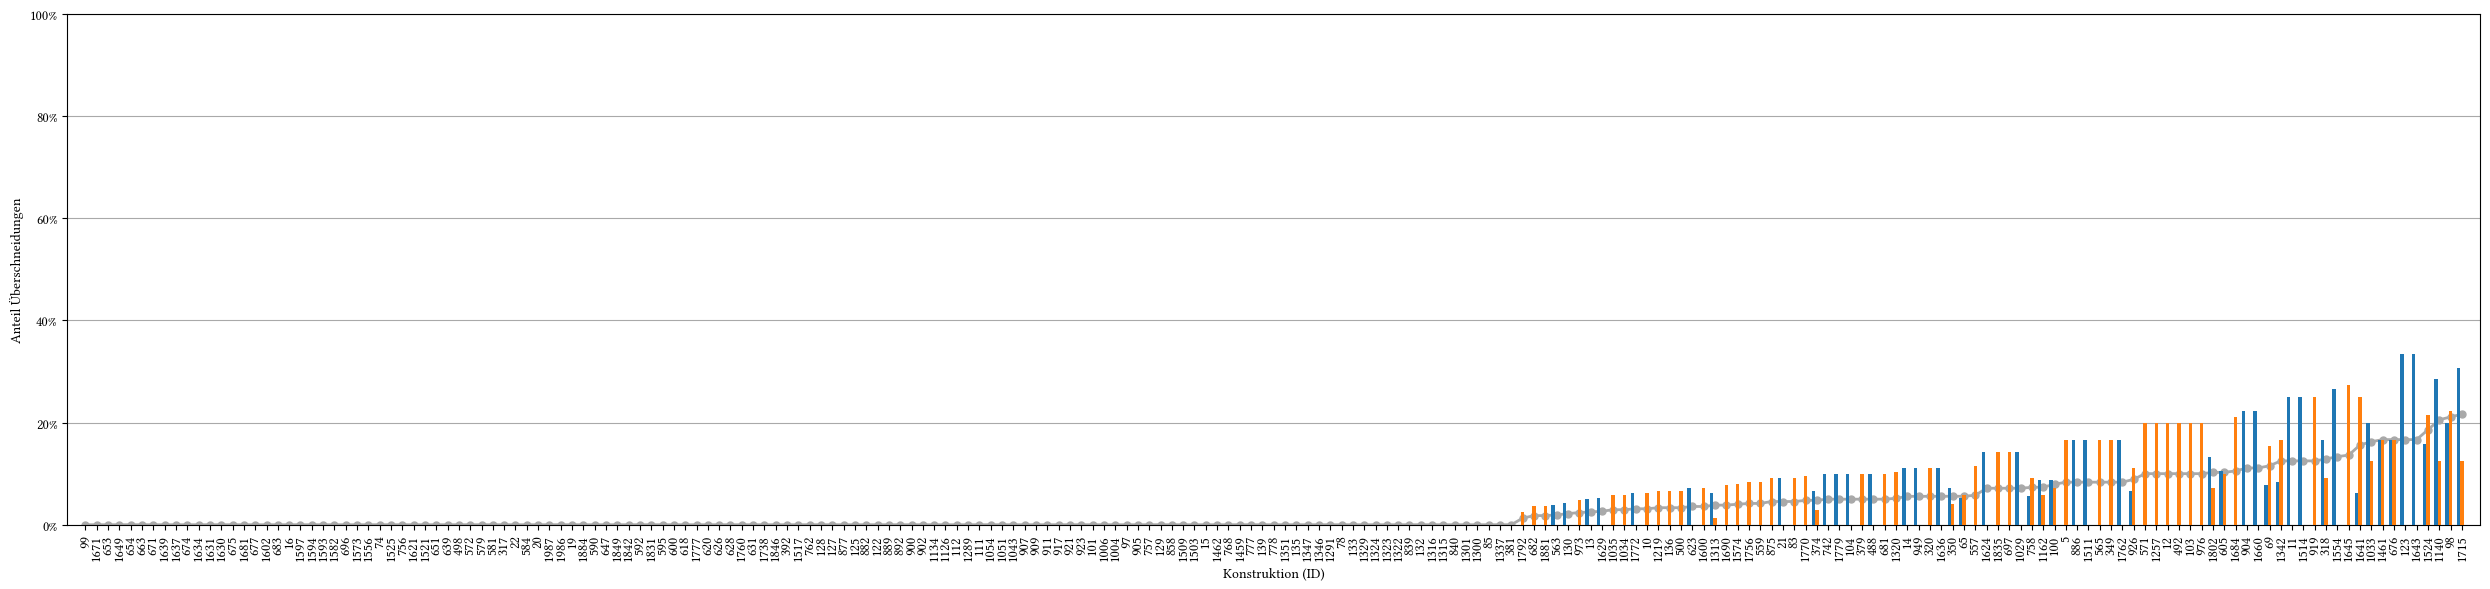

In [118]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]

average_values = pd.concat([constr[1], constr[2]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=True)

constr_strings = [str(i) for i in list(sorted_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(25, 6))
    
# Plot the grouped bars
bar_width = 0.3
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width

ax.bar(bar_positions_1, constr[1][sorted_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][sorted_constructions.index], color='tab:orange', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[sorted_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)

plt.ylim(0, 1)
plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_2[-1] + 2 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_few.pdf')
plt.show()

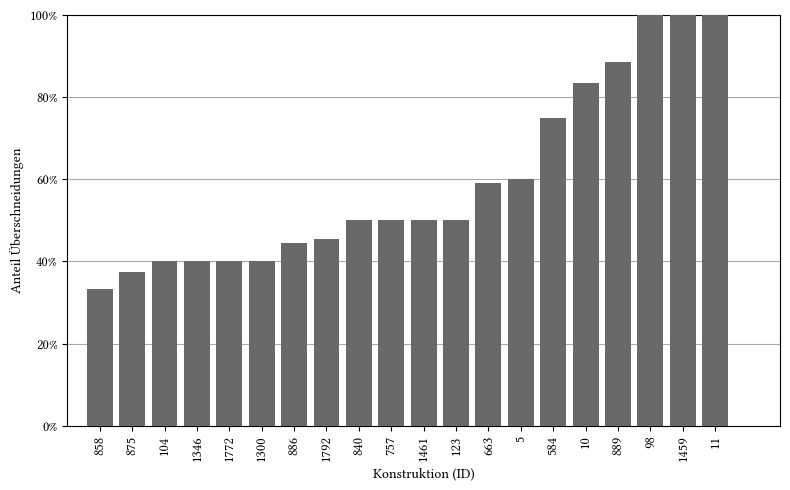

In [119]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]
sorted_constructions = constr[0].sort_values(ascending=True)

flop_20_constructions = sorted_constructions.tail(20)
constr_strings = [str(i) for i in list(flop_20_constructions.index)]
    
plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))

plt.bar(constr_strings, flop_20_constructions.values, color='dimgrey', zorder=3)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))    

plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.xlim(-1, len(constr_strings)+1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_zero_flop20.pdf')
plt.show()

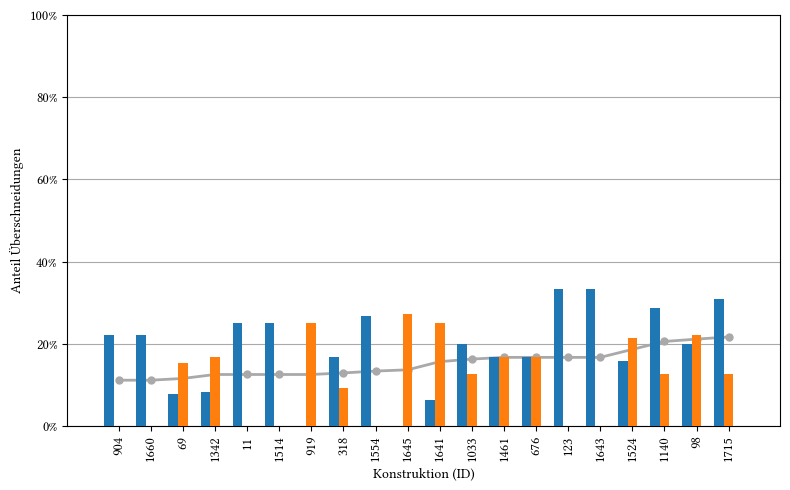

In [120]:
constr = {}
for i, data in llama_data.items():
    constr[i] = data["overlap"]

average_values = pd.concat([constr[1], constr[2]], axis=1).mean(axis=1)
sorted_constructions = average_values.sort_values(ascending=True)

flop_20_constructions = sorted_constructions.tail(20)
constr_strings = [str(i) for i in list(flop_20_constructions.index)]

plt.rcParams['font.family'] = 'Libertinus Serif'
fig, ax = plt.subplots(figsize=(8, 5))
    
# Plot the grouped bars
bar_width = 0.3
bar_positions_1 = np.arange(len(constr_strings))
bar_positions_2 = bar_positions_1 + bar_width

ax.bar(bar_positions_1, constr[1][flop_20_constructions.index], color='tab:blue', width=bar_width, zorder=4)
ax.bar(bar_positions_2, constr[2][flop_20_constructions.index], color='tab:orange', width=bar_width, zorder=4)

plt.plot(bar_positions_1 + bar_width, average_values[flop_20_constructions.index], color='darkgrey', marker='o', linestyle='-', linewidth=2, markersize=5)
    
plt.grid(which='major', axis='y', linestyle='-', color='darkgrey', zorder=0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.xlabel('Konstruktion (ID)')
plt.ylabel('Anteil Überschneidungen')
    
plt.xticks(bar_positions_1 + bar_width, constr_strings, rotation=90)

plt.ylim(0, 1)
plt.xlim(bar_positions_1[0] - bar_width - 1, bar_positions_2[-1] + 2 * bar_width + 1)

plt.tight_layout()
    
plt.savefig(f'llama_overlap_few_flop20.pdf')
plt.show()